In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from pprint import pprint
from sklearn.datasets import load_iris

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import cv2

### Euclidean Distance

In [2]:
def calculate_euclidean_distance(d1,d2):
    dist = 0.0
    for i in range(len(d1)):
        dist +=(d1[i] - d2[i]) **2
    
    return np.sqrt(dist)

### Assign Datapoints to Clusters

In [3]:
def assign_clusters(data, centeroids):
    
    for row in data:
        clusters = []
        for centeroid in centeroids:
            distances = []
            distances.append(calculate_euclidean_distance(row,centeroid))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
        
    return clusters

### Determine Initial Clusters

In [4]:
def initial_clusters(X,k):
   
    cluster_index = random.sample(range(0,X.shape[0]),k)
#     print('index for cluster',cluster_index)

    clusters = [X[i] for i in cluster_index]
#     print('clusters', np.array(clusters))
    
    return clusters

In [5]:
X = np.array([[1,1,12], [2,23,2], [3,3,3], [4,5,4] , [6,7,8]])
k = 2
initial_clusters(X,k)

[array([ 2, 23,  2]), array([4, 5, 4])]

### Calculating distance

In [6]:
def get_distance(X, centroids):
    distances = []
    
    for row in X:
        dis = []
        for centroid in centroids:
            dis.append(calculate_euclidean_distance(row,centroid))
        distances.append(dis)  
    return np.array(distances)

In [7]:
A = np.array([[1,2], [2, 3], [3,4]])
B = np.array([[0,1]])

print(f"A:\n{A}")
print(f"B:\n{B}")
print(f"Distance matrix:\n{get_distance(A,B)}")

A:
[[1 2]
 [2 3]
 [3 4]]
B:
[[0 1]]
Distance matrix:
[[1.41421356]
 [2.82842712]
 [4.24264069]]


### Get k clusters

In [8]:
def get_k_clusters(X, centroids):
    
#     k = centroids.shape[0]
    k = len(centroids)
    clusters = {}
    
    distances = get_distance(X,centroids)
    closest_cluster_ids = np.argmin(distances,axis =1)
        
    for i in range(k):
        clusters[i] = []
    
    for i, cluster_id in enumerate(closest_cluster_ids):
        clusters[cluster_id].append(X[i])
    
    return clusters

In [9]:
X = np.array([[1,2], [2, 3], [3,4]])
centroids = np.array([[0,0], [5,5]])

print(f"Points {X[0]} and X[1] are closer to centroids[0] so they will be in same claster")
print(f"Point {X[2]} is closer to {centroids[1]} so they will be in 2nd claster")

print(f"Clusters: {get_k_clusters(X, centroids)}")

Points [1 2] and X[1] are closer to centroids[0] so they will be in same claster
Point [3 4] is closer to [5 5] so they will be in 2nd claster
Clusters: {0: [array([1, 2]), array([2, 3])], 1: [array([3, 4])]}


### Checking base condition (Whether centeroids changed)

In [10]:
def has_centroids_covered1(previous_centroids, new_centroids, movement_threshold_delta):

    distances_between_old_and_new_centroids = get_distance(previous_centroids, new_centroids)
    centroids_covered = np.max(distances_between_old_and_new_centroids.diagonal()) <= movement_threshold_delta

    return centroids_covered

### Main Algorithm

In [11]:
def perform_k_means_algorithm1(X, k, movement_threshold_delta=0):

    new_centroids = initial_clusters(X, k)
    centroids_covered = False
    iterations = 0
    while (not centroids_covered and iterations < 1000):
        iterations+=1
        previous_centroids = new_centroids
        clusters = get_k_clusters(X, previous_centroids)
        
        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype) for key in sorted(clusters.keys())])
        centroids_covered = has_centroids_covered1(previous_centroids, new_centroids, movement_threshold_delta =movement_threshold_delta )

    return new_centroids

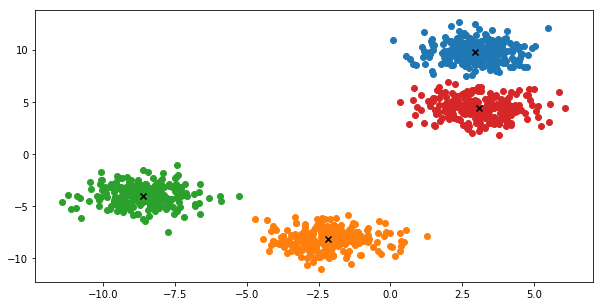

In [12]:
k = 4
X, _ = make_blobs(n_samples=1000, n_features=2, centers=k)

centroids = perform_k_means_algorithm1(X, k, movement_threshold_delta=1/10)
# print('cen', centroids)
clusters = get_k_clusters(X, centroids)

plt.rcParams['figure.figsize'] = [10, 5]
for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)


    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="black")

plt.show()

## Example showing color reduce from an image

In [13]:
def get_reduced_colors_image(image, number_of_colors):
    """
    Function returns given image with reduced number of colors
    Args:
        image (numpy.ndarray): original opencv image, function finds its reduced colors form
        number_of_colors (integer): number of colors in reduced image

    Returns:
        (numpy.ndarray): image with reduced number of colors
    """

    h, w, d = image.shape

    X = np.reshape(image, (h * w, d))
    X = np.array(X, dtype=np.int32)

    centroids = perform_k_means_algorithm1(X, k=number_of_colors)
    distance_matrix = get_distance(X, centroids)
    closest_cluster_ids = np.argmin(distance_matrix, axis=1)

    X_reconstructed = centroids[closest_cluster_ids]
    X_reconstructed = np.array(X_reconstructed, dtype=np.uint8)
    reduced_image = np.reshape(X_reconstructed, (h, w, d))

    return reduced_image

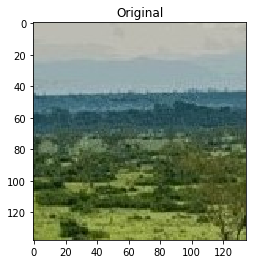

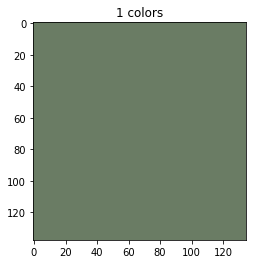

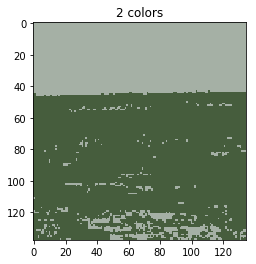

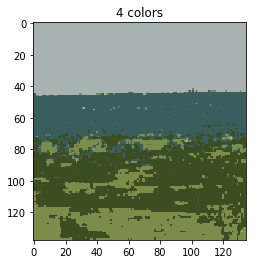

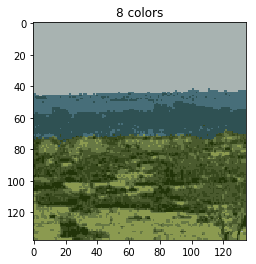

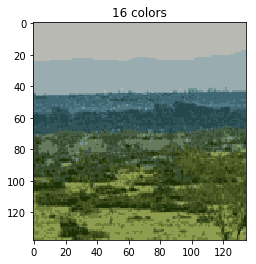

In [18]:
# k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 32, 64]
k_values = [1,2,4,8,16]
reconstrutons = []

img = cv2.imread("image.jpg")
plt.rcParams['figure.figsize'] = [4, 4]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.show()

for k in k_values:
    reduced_colors_image = get_reduced_colors_image(img, k)
    plt.title(f"{k} colors")
    plt.imshow(cv2.cvtColor(reduced_colors_image, cv2.COLOR_BGR2RGB))
    plt.show()
    reconstrutons.append(reduced_colors_image)

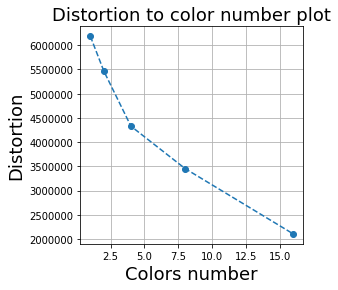

In [21]:
distortions=[]

for i, k in enumerate(k_values):
    distortion = np.sum(np.square(img-reconstrutons[i]))
    
    distortions.append(distortion)
    
plt.grid()
plt.title("Distortion to color number plot", fontsize=18)
plt.xlabel('Colors number', fontsize=18)
plt.ylabel('Distortion', fontsize=18)
plt.plot(k_values, distortions, linestyle='--', marker='o')
plt.show()